In [6]:
import sympy as sp
import numpy as np
import jax
import jax.numpy as jnp
import scipy
from tqdm import trange, tqdm
from itertools import product
jax.config.update("jax_enable_x64", True)

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout  # Use this for hierarchical layout
import autoscattering.architecture as arch
import copy

def identify_direct_subgraphs(graph, allowed_entries):
    all_subgraphs = []
    for idx, element in enumerate(graph):
        allowed_entries_element = allowed_entries[idx]
        if element != np.min(allowed_entries_element):
            new_entry = allowed_entries_element[np.where(allowed_entries_element == element)[0][0] - 1]
            new_graph = graph.copy()
            new_graph[idx] = new_entry
            all_subgraphs.append(new_graph)
    return all_subgraphs

def find_graph_idx(graph, all_graphs):
    for count, test_graph in enumerate(all_graphs):
        if np.all(graph==test_graph):
            return count
    return None



In [7]:

num_modes = 3
num_couplings = (num_modes**2 + num_modes)//2
allowed_entries = [[0,1]]*num_couplings
all_graphs = []
complexity_levels = []
for p_coupl in tqdm(product(*allowed_entries)):
    all_graphs.append(np.array(p_coupl, dtype='int8'))
    complexity_levels.append(sum(p_coupl))
all_graphs = np.asarray(all_graphs)
complexity_levels = np.asarray(complexity_levels)

num_graphs = len(all_graphs)
sort_idxs = np.flip(np.argsort(complexity_levels))
all_graphs = all_graphs[sort_idxs]
complexity_levels = complexity_levels[sort_idxs]

64it [00:00, 189841.20it/s]


In [13]:
list_of_irreducible_graphs = [all_graphs[-10]]

  0%|          | 0/64 [00:00<?, ?it/s]

100%|██████████| 64/64 [00:00<00:00, 1157.20it/s]


starting position evaluation
starting drawing


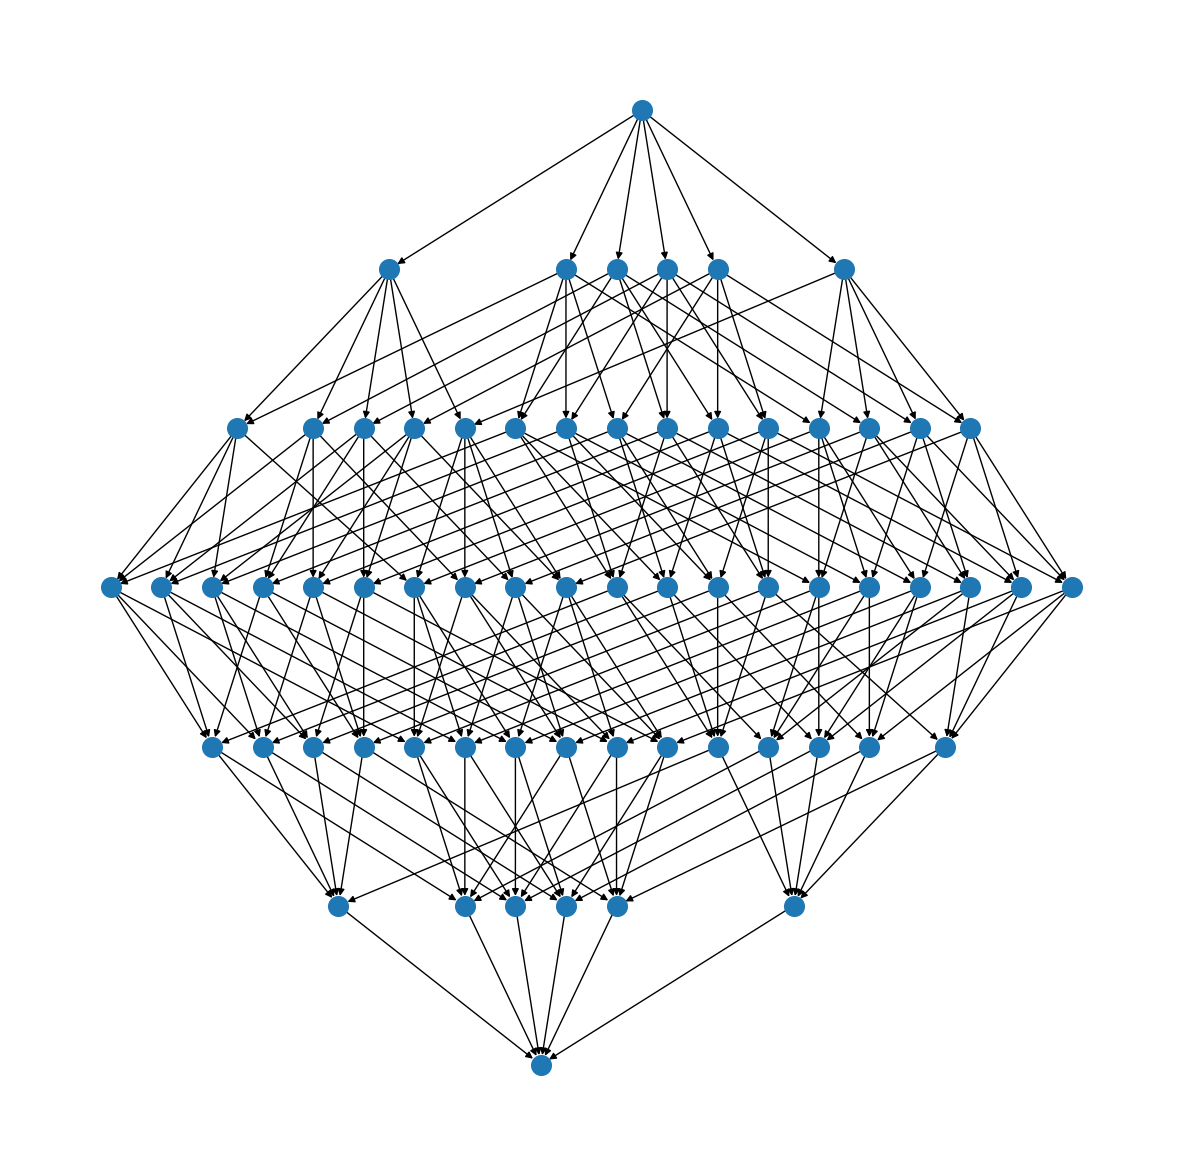

In [15]:


fig, ax = plt.subplots(figsize=(15,15))

G = nx.DiGraph()
G.add_nodes_from([idx for idx in range(num_graphs)])

node_labels = {}
# for idx in range(num_graphs):
#     node_labels[idx] = str(idx)

node_colors = []
for idx in tqdm(range(num_graphs)):
    selected_graph = all_graphs[idx]
    # check if graph is valid or not
    if find_graph_idx(selected_graph, list_of_irreducible_graphs) is not None:
        color = 'blue'
    elif arch.check_if_subgraph_upper_triangle(selected_graph, list_of_irreducible_graphs):
        color = 'green'
    else:
        color = 'red'
    node_colors.append(color)

    subgraphs = identify_direct_subgraphs(selected_graph, allowed_entries)
    for subgraph in subgraphs:
        idx_subgraph = find_graph_idx(subgraph, all_graphs)
        # if idx_subgraph is not None:
        G.add_edge(idx, idx_subgraph)

print('starting position evaluation')
pos = graphviz_layout(G, prog="dot")  # 'dot' is used for hierarchical (top-down) layout
print('starting drawing')
nx.draw(
    G,
    pos,
    ax=ax,
    # node_color=node_colors,
    node_size=200
    # labels=node_labels
)

In [25]:
10*(num_couplings-3)/(3)

10.0

In [27]:
15*(num_couplings-2)/3

20.0

reproduce search space behaviour for 1 invalid node in the 1st layer

In [39]:
scipy.special.binom(num_couplings, 2) - 1 * (num_couplings-1)

10.0

In [33]:
scipy.special.binom(num_couplings, 3) - 1 * (num_couplings-1) * (num_couplings-2)/2

10.0

In [36]:
scipy.special.binom(num_couplings, 4) - 1 * (num_couplings-1) * (num_couplings-2) * (num_couplings-3)/(2*3)

5.0

In [37]:
scipy.special.binom(num_couplings, 5) - 1 * (num_couplings-1) * (num_couplings-2) * (num_couplings-3)*(num_couplings-4)/(2*3*4)

1.0

In [38]:
scipy.special.binom(num_couplings, 6) - 1 * (num_couplings-1) * (num_couplings-2) * (num_couplings-3)*(num_couplings-4)*(num_couplings-5)/(2*3*4*5)

0.0

reproduce search space behaviour for 1 invalid node in the 2nd layer

In [43]:
scipy.special.binom(num_couplings, 5)

6.0

In [54]:
y1 = 2
layer_idx = 2
product = 
scipy.special.binom(num_couplings, layer_idx) - (y1 * (num_couplings - layer_idx + 1) - scipy.special.binom(y1, layer_idx) )

6.0

In [83]:
def calc_valid_graphs(layer_idx, y1):
    layer_invalid = 1
    return scipy.special.binom(num_couplings, layer_idx) - (y1 * scipy.special.binom(num_couplings-layer_invalid, layer_idx - layer_invalid) - scipy.special.binom(y1, layer_idx))

# def calc_valid_graphs(layer_idx, y1):
#     layer_invalid = 1
#     product = y1 * (num_couplings-layer_invalid) - scipy.special.binom(y1, layer_idx)
#     count = 1
#     for idx2 in range(layer_invalid+1, layer_idx):
#         count += 1
#         product *= (num_couplings-idx2) / count
#     return scipy.special.binom(num_couplings, layer_idx) - ( product)

In [85]:
calc_valid_graphs(layer_idx=2, y1=2)

6.0

In [89]:
(y1 * scipy.special.binom(num_couplings-1, 2 - 1))

10.0

In [131]:
def calc_valid_graphs(layer_idx, y1):
    # works for arbitrary y1
    product = 1
    for layer in range(1,layer_idx+1):
        product *= (num_couplings - layer + 1 - y1)/layer
    return product

calc_valid_graphs(4, y1=2)

1.0

In [ ]:
def calc_valid_graphs(layer_idx, y2):
    product = 1
    for layer in range(1,layer_idx+1):
        
        product *= (num_couplings - layer + 1)/layer
        
    return product

calc_valid_graphs(4, y1=2)

In [153]:
# for 3rd layer, works for arbitrary values of y2 as long as best case scenario (no overlap)
y2 = 3
scipy.special.binom(num_couplings, 3) - y2 *(num_couplings - 2)

8.0

In [160]:
# for 4th layer, works for arbitrary values of y2 as long as best case scenario (no overlap)
y2 = 3
scipy.special.binom(num_couplings, 3)*(num_couplings - 2)/4  - y2 *(num_couplings - 2)*(num_couplings - 3)/3

8.0

In [178]:
# for 3rd layer, works for (0,1,2,3) of y2 as long as worst case scenario (max overlap)
y2 = 3
scipy.special.binom(num_couplings, 3) - y2 *(num_couplings - 2) + scipy.special.binom(y2, 2)

11.0